<a href="https://colab.research.google.com/github/mohit-singh4180/Machine_learning/blob/main/Classification_ANN_assignment_day_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow

In [2]:
data=pd.read_csv(r"Loan-Approval-Prediction.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:

data.dropna(inplace=True)

In [5]:
data["ApplicantIncome"]=data["ApplicantIncome"].fillna(round(data["ApplicantIncome"].mean(),1))
data["CoapplicantIncome"]=data["CoapplicantIncome"].fillna(round(data["CoapplicantIncome"].mean(),1))
data["LoanAmount"]=data["LoanAmount"].fillna(round(data["LoanAmount"].mean(),1))
data["Loan_Amount_Term"]=data["Loan_Amount_Term"].fillna(round(data["Loan_Amount_Term"].mean(),1))

In [6]:
data["Gender"].mode()[0]

'Male'

In [7]:
data["Gender"]=data["Gender"].fillna(data["Gender"].mode()[0])
data["Married"]=data["Married"].fillna(data["Married"].mode()[0])
data["Loan_Status"]=data["Loan_Status"].fillna(data["Loan_Status"].mode()[0])
data["Self_Employed"]=data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])
data["Credit_History"]=data["Credit_History"].fillna(data["Credit_History"].mode()[0])
data["Education"]=data["Education"].fillna(data["Education"].mode()[0])


In [8]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [10]:
data.drop(labels=["Loan_ID"],inplace=True,axis=1) # axis=0 ==> rows , 1 means Column

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data["Gender"]=encoder.fit_transform(data["Gender"])
data["Married"]=encoder.fit_transform(data["Married"])
data["Loan_Status"]=encoder.fit_transform(data["Loan_Status"])
data["Education"]=encoder.fit_transform(data["Education"])
data["Self_Employed"]=encoder.fit_transform(data["Self_Employed"])
data["Property_Area"]=encoder.fit_transform(data["Property_Area"])
data["Dependents"]=encoder.fit_transform(data["Dependents"])

In [12]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
data.shape

(480, 12)

In [13]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [14]:
data.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
x_scaled=scaler.transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
stop=EarlyStopping(patience=4)
model=Sequential() 
model.add(Dense(35,activation="relu"))
model.add(Dense(25,activation="relu")) 
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy")
model.fit(X_train,y_train,epochs=50,batch_size=1,validation_data=(X_test,y_test))

Epoch 1/50
384/384 [==============================] - 3s 5ms/step - loss: 33.4586 - val_loss: 23.7795
Epoch 2/50
384/384 [==============================] - 2s 4ms/step - loss: 36.3034 - val_loss: 9.6114
Epoch 3/50
384/384 [==============================] - 2s 5ms/step - loss: 20.2377 - val_loss: 10.2290
Epoch 4/50
384/384 [==============================] - 2s 5ms/step - loss: 20.7586 - val_loss: 108.6867
Epoch 5/50
384/384 [==============================] - 1s 3ms/step - loss: 21.5970 - val_loss: 46.5152
Epoch 6/50
384/384 [==============================] - 2s 4ms/step - loss: 19.3705 - val_loss: 46.3712
Epoch 7/50
384/384 [==============================] - 2s 4ms/step - loss: 14.5748 - val_loss: 15.7140
Epoch 8/50
384/384 [==============================] - 2s 5ms/step - loss: 14.5615 - val_loss: 8.8202
Epoch 9/50
384/384 [==============================] - 2s 4ms/step - loss: 15.4366 - val_loss: 6.3377
Epoch 10/50
384/384 [==============================] - 2s 5ms/step - loss: 11.1899 -

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 35)                   420       
                                                                 
 dense_1 (Dense)             (1, 25)                   900       
                                                                 
 dense_2 (Dense)             (1, 1)                    26        
                                                                 
Total params: 1,346
Trainable params: 1,346
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

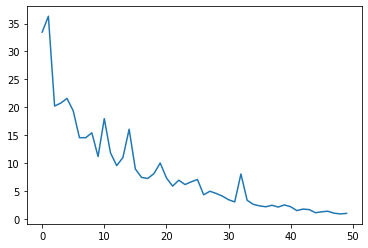

In [20]:
plt.plot(model.history.history.get("loss"))

In [26]:
ypred=model.predict(X_test)
ypred_classes = (model.predict(X_test) > 0.5).astype("int32")
result=pd.DataFrame(ypred_classes, columns=["y_pred"])
result["y_test"]=y_test
result

,y_pred,y_test
0,1,0
1,1,0
2,1,1
3,1,0
4,0,0
...,...,...
91,1,0
92,1,1
93,1,1
94,1,0


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
accuracy_score(y_test, ypred_classes)

0.6458333333333334

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_classes))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06        35
           1       0.64      1.00      0.78        61

    accuracy                           0.65        96
   macro avg       0.82      0.51      0.42        96
weighted avg       0.77      0.65      0.52        96



In [31]:
confusion_matrix(y_test, ypred_classes) 


array([[ 1, 34],
       [ 0, 61]])